# PROJECT
## PREDICTING THE LIKELIHOOD OF HEART DISEASE FROM PATIENTS

## PROJECT UNDERSTANDING

### Project Overview
The primary objective of this capstone project is to create a predictive model that assesses the likelihood of heart disease in patients based on a variety of health-related features. The model will leverage data from the "heart_disease.csv" dataset, which includes demographic information, clinical measurements, and historical healt data.

### Problem Statement
Heart disease remains a significant public health concern in Kenya, with increasing cases linked to lifestyle changes, urbanization, and inadequate access to preventive healthcare. Despite growing awareness, early detection and risk assessment remain challenging due to limited local research and data-driven insights. This study aims to analyze key health indicators. By identifying major risk factors and trends, this research seeks to support healthcare professionals, policymakers, and researchers in developing targeted interventions, improving early diagnosis, and enhancing public health strategies to combat heart disease in Kenya.

### General Objectives
1. Developing a Predictive Model:
- Objective: Create a machine learning model that accurately predicts the likelihood of heart disease based on patient data.
- Key Performance Indicators (KPIs): Model accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
- Outcome: A validated model that can be used in clinical settings to assess patient risk.
2. Identify Key Risk Factors:
- Objective: Analyze the dataset to determine which features are the most significant predictors of heart disease.
- KPIs: Identification of top risk factors, correlation coefficients, and feature importance scores.
- Outcome: A report detailing the primary risk factors associated with heart disease, which can inform patient education and preventive strategies.
3. Enhance Patient Care:
- Objective: Provide healthcare professionals with a tool that aids in the early detection and management of heart disease.
- KPIs: User satisfaction ratings, number of healthcare providers using the tool, and feedback from clinical trials.
- Outcome: Improved patient outcomes through timely interventions based on risk assessments generated by the model.
4. Facilitate Data-Driven Decision Making:
- Objective: Enable healthcare organizations to make informed decisions regarding resource allocation and preventive care strategies based on model predictions.
- KPIs: Changes in resource allocation, reduction in hospital admissions for heart disease, and improved health outcomes in high-risk populations.
- Outcome: A framework for integrating predictive analytics into healthcare decision-making processes.
5. Raise Awareness and Educate Patients:
- Objective: Increase awareness of heart disease risk factors among patients and the general public through educational materials and outreach programs.
- KPIs: Number of educational sessions conducted, patient engagement metrics, and changes in patient knowledge and behavior regarding heart health.
- Outcome: A more informed patient population that actively participates in their health management, leading to a reduction in heart disease prevalence.

### Expected Outcomes
The expected outcomes of this project include:

- A Predictive Model: A machine learning model that accurately predicts the likelihood of heart disease based on input features, with a focus on achieving high accuracy and reliability.
- Insights into Risk Factors: A comprehensive analysis of the most significant risk factors associated with heart disease, which can inform both clinical practice and public health initiatives.
- User -Friendly Tool: A prototype or application that allows healthcare providers to input patient data and receive risk assessments, facilitating easier integration into clinical workflows.
- Documentation and Reporting: A detailed report summarizing the methodology, findings, and recommendations for future research or implementation in healthcare settings.

### Metrics of success (benefits)
- Early Detection and Prevention- will help identidy individuals who are at high risk of heart diseases before symptoms appear. This will also lead to encouaraging early lifestyle changes to prevent disease progression and access the right medication which reduces the long run costs.
- Personalized Healthcare-Helps doctors and patients make informed decisions based on personal risk factors and make proper judgement on tests and screenings to be done.
- Cost Savings in Healthcare- By detecting this symptoms early and managing risk factors, you reduce hospital admissions.Lowers the burden on insurance and healthcare systems by minimizing costly late-stage treatments.
- Research and Development- A predictive model can aid in medical research by identifying new patterns in heart disease risks.Provides insights into key factors contributing to heart disease, leading to better prevention strategies.
- Data-Driven Public Health Strategies- Helps governments and healthcare organizations design policies to reduce heart disease prevalence and allow government to make better budget allocations to deal with these cases.

## DATA UNDERSTANDING

##### Importing Liblaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
# Ignore warnings
warnings.filterwarnings("ignore")

##### Loading our data

In [2]:
data = pd.read_csv("heart_disease.csv")

In [3]:
# checking the first few rows
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
# checking the last few rows
data.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes
9999,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Yes,High,Medium,5.659394,High,121.0,149.0,14.387810,6.208531,Yes


In [5]:
# checking the number of columns and rows in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

Our data has a 21 columns and 10,000 rows.

Columns Descriptions
- Age; Represents the age of the individual in years. Age is a significant risk factor for heart disease, with older individuals generally at higher risk.
- Gender; Indicates the gender of the individual, typically coded as 0 for female and 1 for male. Gender can influence the risk of heart disease due to biological and lifestyle factors.
- Blood Pressure; Refers to the individual's blood pressure reading, usually measured in mmHg (millimeters of mercury). High blood pressure (hypertension) is a major risk factor for heart disease.
- Cholesterol Level; Represents the total cholesterol level in the blood, measured in mg/dL (milligrams per deciliter). High cholesterol levels can lead to plaque buildup in arteries, increasing heart disease risk.
- Exercise Habit; Indicates the frequency or quality of physical activity the individual engages in. Regular exercise is associated with a lower risk of heart disease.
- Smoking; Indicates whether the individual smokes tobacco, often coded as 0 for non-smokers and 1 for smokers. Smoking is a well-known risk factor for heart disease.
- Family Heart Disease; Indicates whether there is a family history of heart disease, typically coded as 0 for no family history and 1 for a positive family history. A family history can increase an individual's risk.
- Diabetes; Indicates whether the individual has diabetes, often coded as 0 for non-diabetics and 1 for diabetics. Diabetes is a significant risk factor for heart disease.
- BMI (Body Mass Index); A measure of body fat based on height and weight, calculated as weight in kilograms divided by height in meters squared. A high BMI can indicate obesity, which is a risk factor for heart disease.
- High Blood Pressure; Indicates whether the individual has been diagnosed with high blood pressure, typically coded as 0 for no and 1 for yes. This is a direct risk factor for heart disease.
- Low LDL Cholesterol; Refers to low levels of high-density lipoprotein (HDL) cholesterol, often considered "good" cholesterol. Low HDL levels can increase the risk of heart disease.
- High LDL Cholesterol; Refers to high levels of low-density lipoprotein (LDL) cholesterol, often considered "bad" cholesterol. High LDL levels are associated with an increased risk of heart disease.
- Alcohol Consumption; Indicates the amount of alcohol consumed by the individual, often measured in standard drinks per week. Excessive alcohol consumption can contribute to heart disease.
- Stress Level; Represents the individual's perceived level of stress, which can be measured through various scales. High stress levels can negatively impact heart health.
- Sleep Hour; Indicates the average number of hours the individual sleeps per night. Poor sleep quality and insufficient sleep are linked to an increased risk of heart disease.
- Sugar Consumption; Refers to the amount of sugar consumed by the individual, often measured in grams per day. High sugar intake can contribute to obesity and diabetes, increasing heart disease risk.
- Triglyceride Level; Represents the level of triglycerides in the blood, measured in mg/dL. High triglyceride levels can increase the risk of heart disease.
- Fasting Blood Sugar; Indicates the blood sugar level after fasting, measured in mg/dL. Elevated fasting blood sugar levels can indicate diabetes or prediabetes, which are risk factors for heart disease.
- CRP Level (C-Reactive Protain Level; Measures the level of C-reactive protein in the blood, which can indicate inflammation. High CRP levels are associated with an increased risk of heart disease.
- Homocystein Level; Refers to the level of homocysteine in the blood, an amino acid that, at elevated levels, can increase the risk of heart disease.
- Heart Disease Status; Indicates whether the individual has been diagnosed with heart disease, typically coded as 0 for no heart disease and 1 for heart disease. This is the target variable for predictive modeling.

In [6]:
# let's check for missing values in our data
data.isna().sum()

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

All columns in our data have missing values except the `Heart Disease Status` column.

In [7]:
# let's check for duplicates in our data
data.duplicated().sum()

0

Our data has no duplicates

### DATA CLEANING

Under data cleaning we'll handle missing values in our data.

In [8]:

# Data Cleaning
# Handling missing values
imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

data.dropna(inplace=True)  # Drop remaining categorical missing values

In [9]:
# let's check if we've handled the missing values
data.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

Now we have a clean data with no missing values.

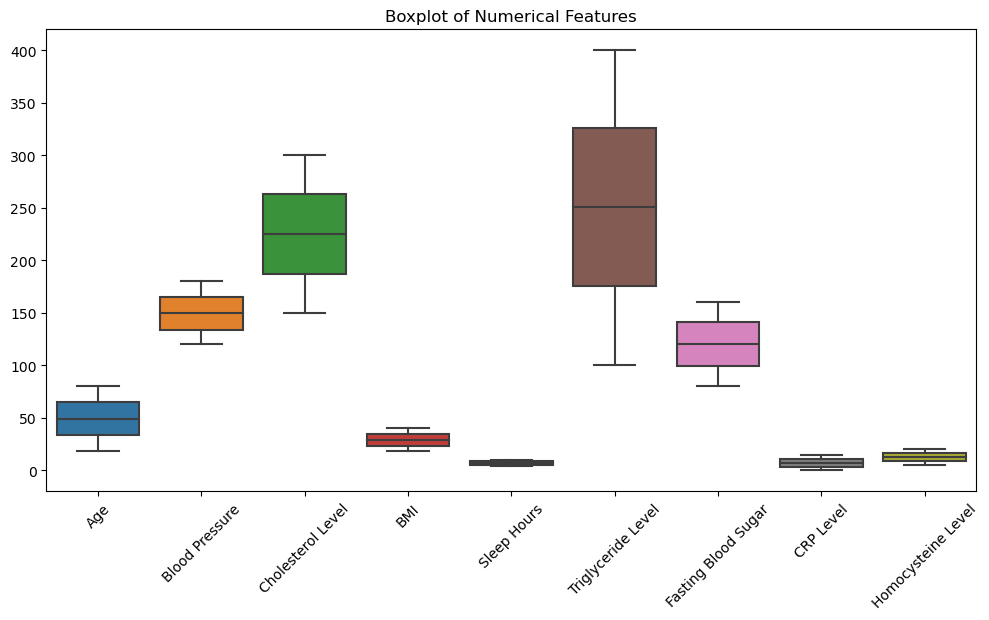

In [10]:
# Boxplot for numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

### EXPLORATORY DATA ANALYSIS (EDA)

Visualizing the Distribution of Target Variable

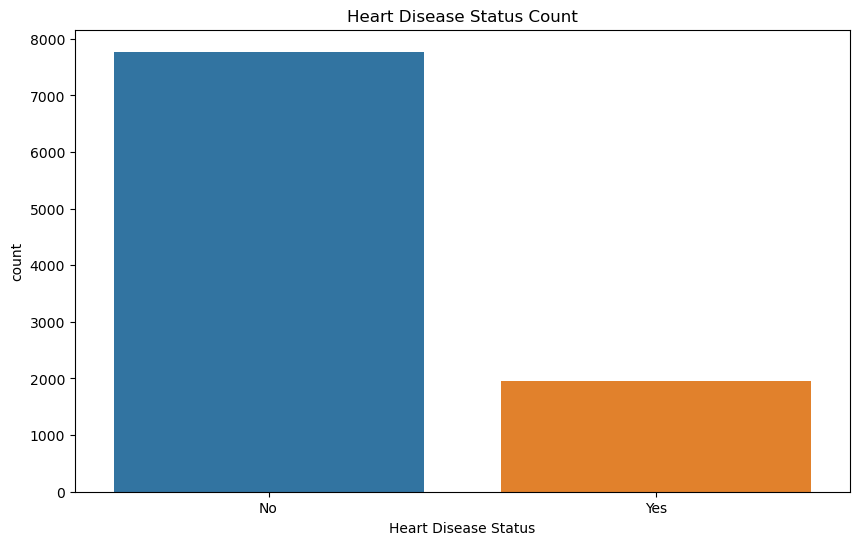

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Heart Disease Status', data=data)
plt.title('Heart Disease Status Count')
plt.show()

Visualizing the Distribution of Numerical Features

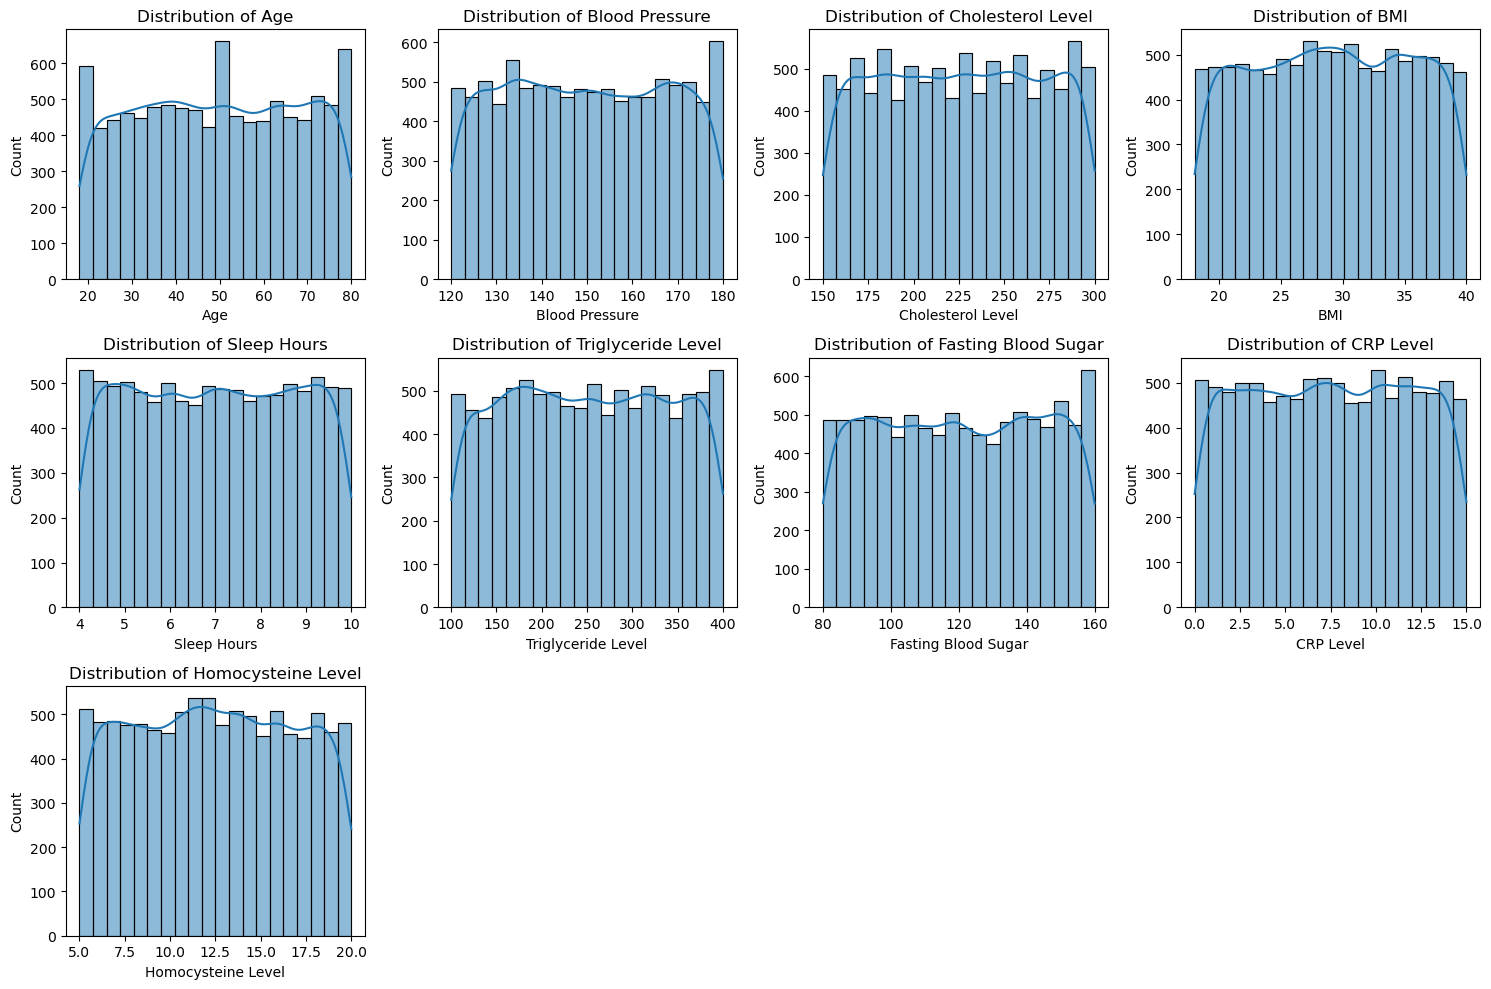

In [12]:
# Ploting histograms for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Seting up the matplotlib figures
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Analyze Categorical Features in comparison with the target variable

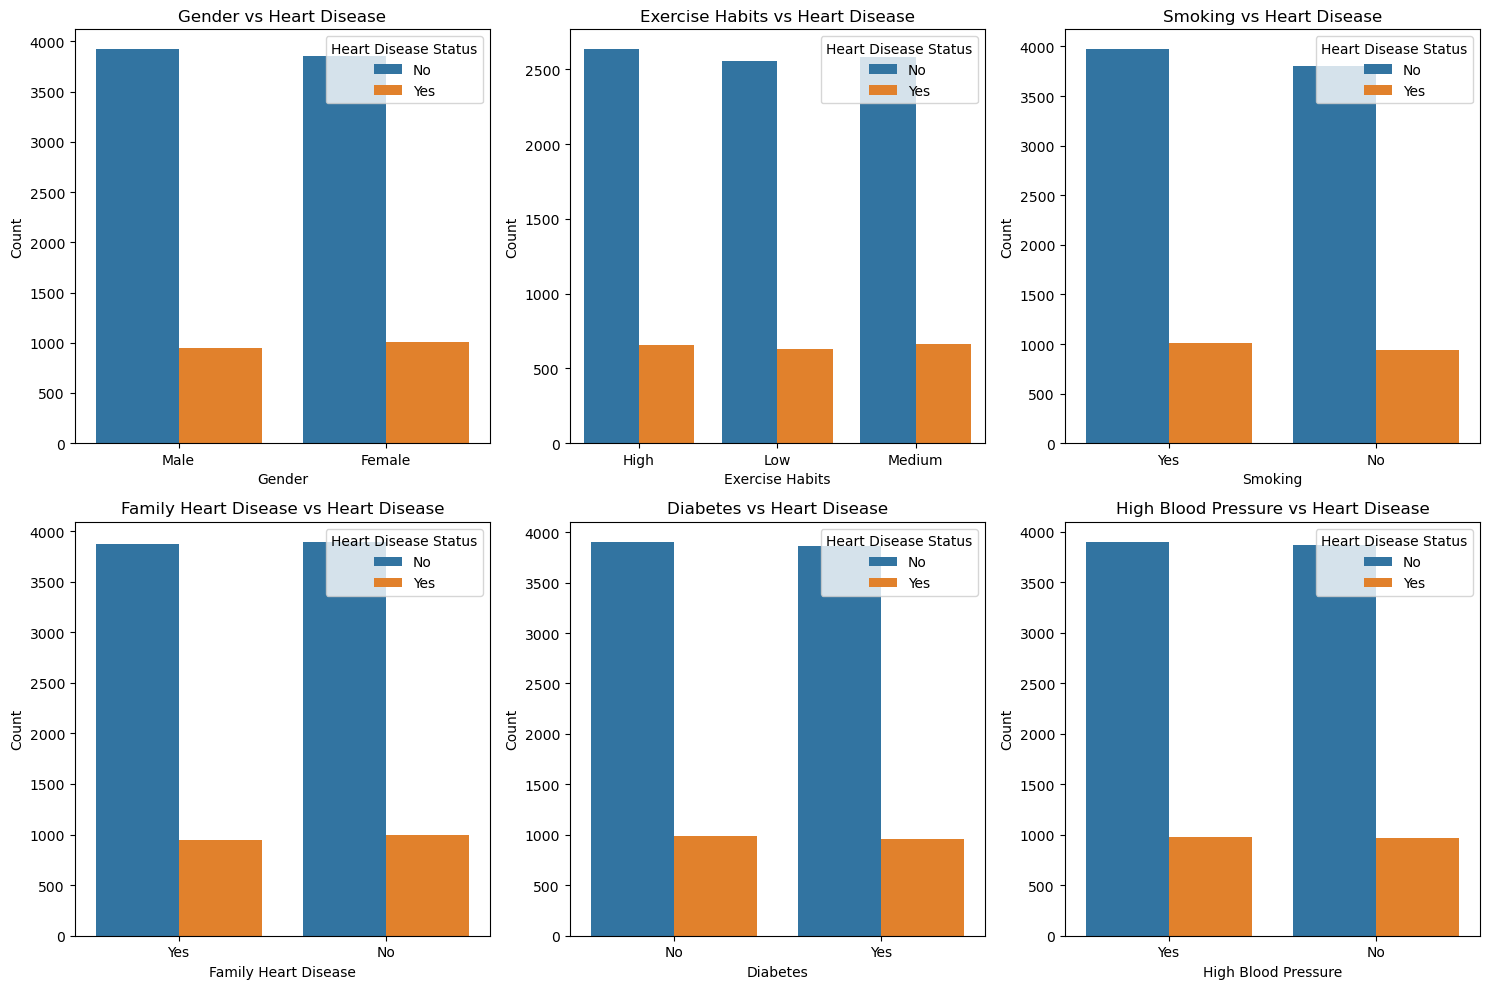

In [13]:
# Visualizing the relationship between categorical features and the target variable
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Limiting to the first 6 features for visualization
categorical_features = categorical_features[:6]

# Seting up the matplotlib figure
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, hue='Heart Disease Status', data=data)  
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

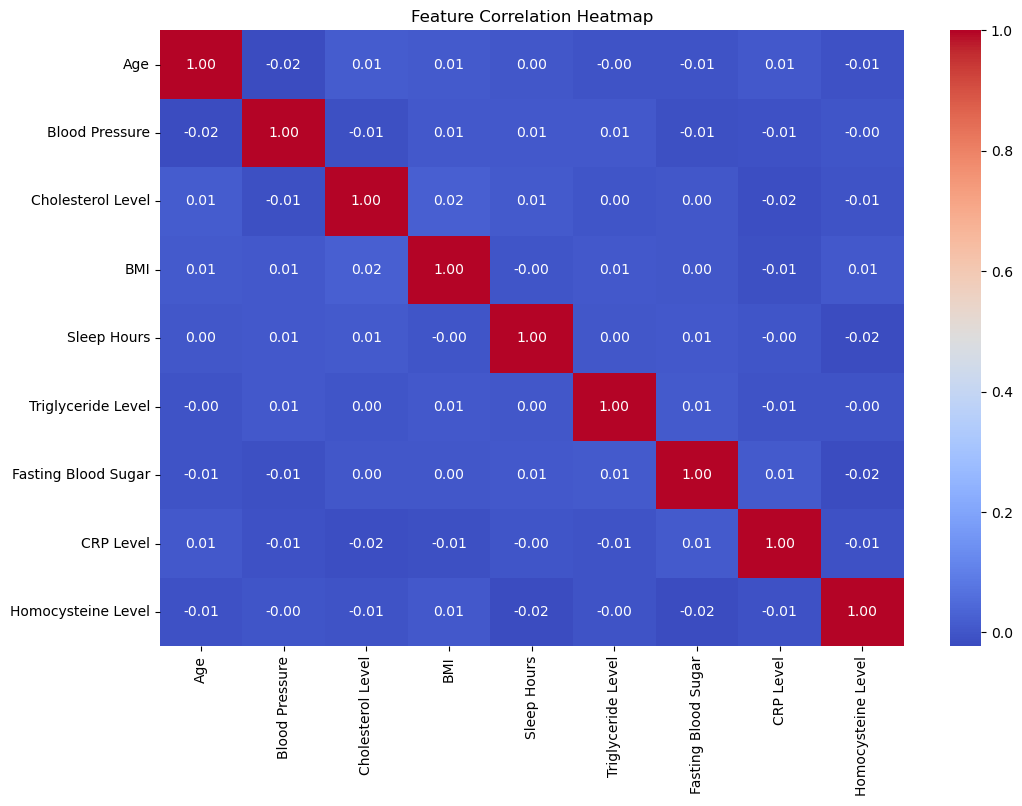

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [15]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

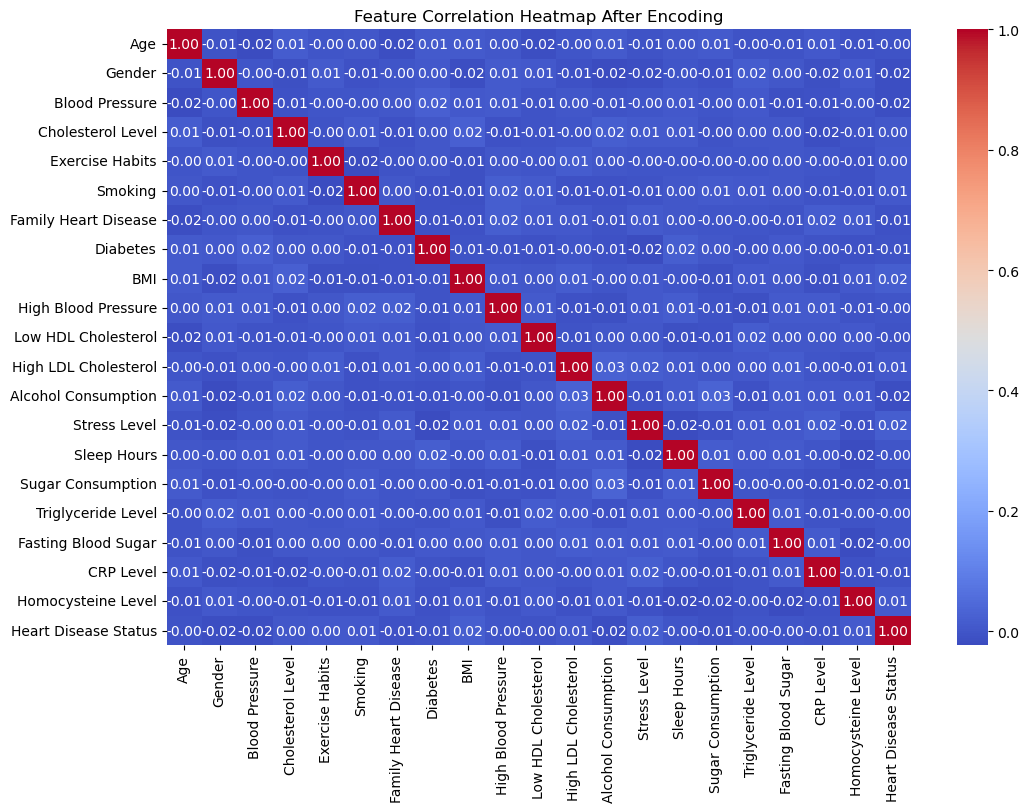

In [30]:
# Correlation heatmap after encoding
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap After Encoding')
plt.show()

### DATA PREPARATION

In [16]:
# Data Preparation
X = data.drop(columns=['Heart Disease Status'])  # Features
y = data['Heart Disease Status']  # Target

In [17]:
# Handling Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### MODELING

#### Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)
print('\nRandom Forest Model')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Model
Accuracy: 0.8025088452878739
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1551
           1       0.84      0.75      0.79      1558

    accuracy                           0.80      3109
   macro avg       0.81      0.80      0.80      3109
weighted avg       0.81      0.80      0.80      3109



#### Logistic Regression

In [22]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [23]:
y_pred_lr = lr_model.predict(X_test)
print('\nLogistic Regression Model')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model
Accuracy: 0.7143776133805082
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1551
           1       0.72      0.71      0.71      1558

    accuracy                           0.71      3109
   macro avg       0.71      0.71      0.71      3109
weighted avg       0.71      0.71      0.71      3109



#### GradientBoostingClassifier Model

In [24]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [25]:
y_pred_gb = gb_model.predict(X_test)
print('\nGradientBoostingClassifier Model')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


GradientBoostingClassifier Model
Accuracy: 0.7561917015117401
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1551
           1       0.76      0.74      0.75      1558

    accuracy                           0.76      3109
   macro avg       0.76      0.76      0.76      3109
weighted avg       0.76      0.76      0.76      3109



#### Support Vector Machine Model

In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [27]:
y_pred_svm = svm_model.predict(X_test)
print('\nsvm Model')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


svm Model
Accuracy: 0.7680926342875523
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1551
           1       0.80      0.72      0.76      1558

    accuracy                           0.77      3109
   macro avg       0.77      0.77      0.77      3109
weighted avg       0.77      0.77      0.77      3109



### ADVANCED MACHINE LEARNING (Hyperparameter Tuning)

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [29]:
# Best Model Evaluation
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_auc = roc_auc_score(y_test, y_pred_best)
best_report = classification_report(y_test, y_pred_best)

print(f'\nBest Random Forest Model Accuracy: {best_accuracy}')
print(f'Best ROC AUC Score: {best_auc}')
print('Best Model Classification Report:\n', best_report)


Best Random Forest Model Accuracy: 0.8076551945963333
Best ROC AUC Score: 0.8077831272051904
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1551
           1       0.85      0.75      0.80      1558

    accuracy                           0.81      3109
   macro avg       0.81      0.81      0.81      3109
weighted avg       0.81      0.81      0.81      3109

